C:\Users\alexh\AppData\Local\Temp/ipykernel_7660/1573254544.py:27: RuntimeWarning: divide by zero encountered in log
  log_data = np.log(data)


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
   0   0   0   0   0  11  58   3   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   1   9 204 331 367 357 457 553 656 658 552
 443 435 384 398 354 384]


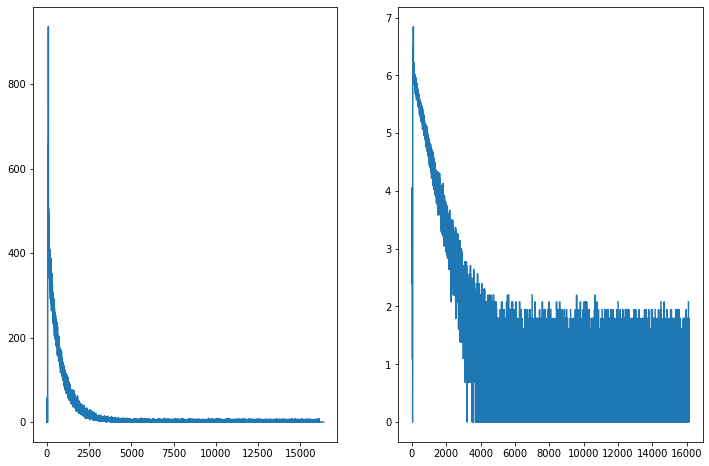

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = np.zeros((16384), np.int32)

def addData(path):
    f = open(path, "r")
    for i in range(12):
        f.readline()

    for i in range(16383):
        data[i] += int(f.readline())

    f.close()

addData("0227_Data.Spe")
addData("0306_Data.Spe")
addData("0308_Data.Spe")
addData("0315_Data.Spe")
addData("0403_Data.Spe")


bins = np.arange(0, 16384, 1)

log_data = np.log(data)

print(data[:60])

fig, axes = plt.subplots(1, 2, figsize = (22, 8))

axes[0].plot(bins, data)
axes[1].plot(bins, log_data)
plt.show()
